<font size="10">**Zomato Data Analysis Using Python**

<font size="5">**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font size="5">**Creating the Data Frame:**

In [9]:
dataframe = pd.read_csv("C:/Users/Win 10/project/Zomato data .csv")

In [11]:
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


<font size="5">**Data Cleaning: Converting the Data Type of the "rate" column to float and removing the denominator:**

In [15]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


<font size="5">**Data Overview:**


In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<font size="5">**Conclusion- There is no NULL values in the data frame**

<font size="6">**Analysis:**

<font size="5">**Most Popular Type of Restaurant Among Customers:**


Text(0.5, 0, 'Type of restaurant')

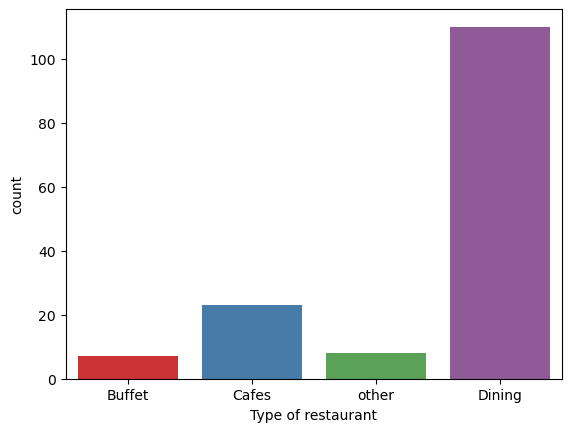

In [35]:
sns.countplot(x=dataframe['listed_in(type)'],color='skyblue')
plt.xlabel("Type of restaurant")

<font size="5">**Conclusion- Dining restaurants are preferred by larger number of individuals.**


<font size="5">**Number of Votes Each Restaurant Type Received from Customers:**

Text(0, 0.5, 'Votes')

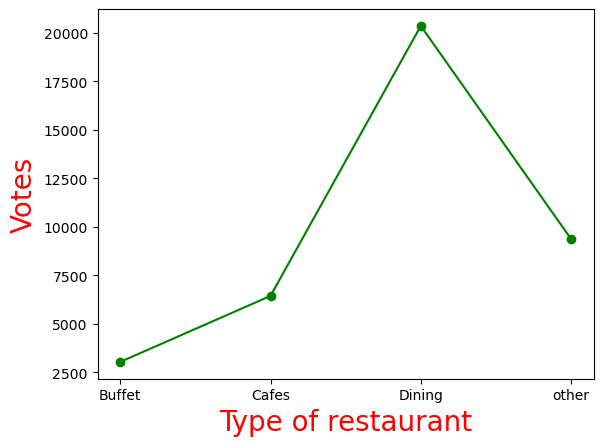

In [37]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

<font size="5">**Conclusion- Dining restaurants recieved highest number of votes**

<font size="5">**Ratings Received by Restaurants:**

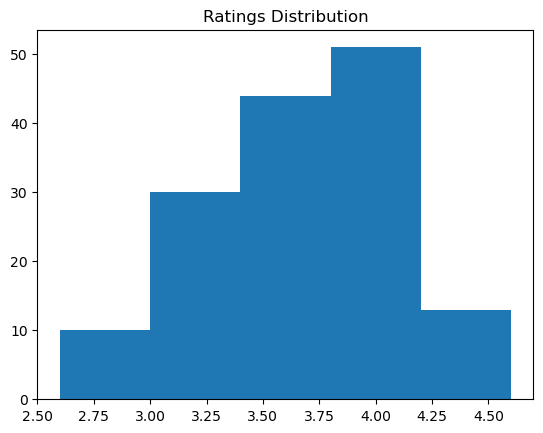

In [39]:
plt.hist(dataframe['rate'], bins=5)
plt.title("Ratings Distribution")
plt.show()

<font size="5">**Conclusion-The majority of the restaurants received ratings between 3.5 and 4**

<font size="5">**Average Spending Between Couples:**

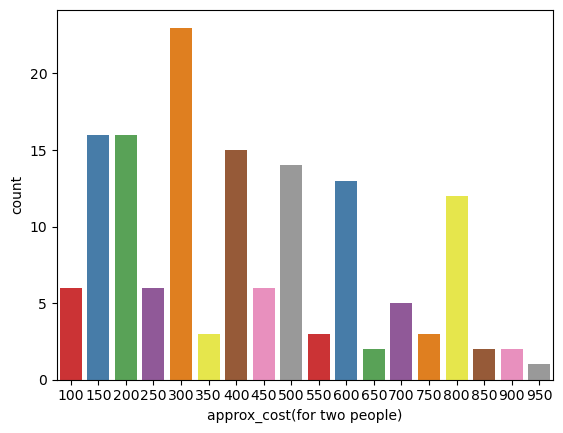

In [78]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, hue=couple_data, palette='Set1',dodge= False)
plt.legend().remove()

<font size="5">**Conclusion-The majority of couple prefer restaurants with an approximate cost of 300 rupees**

<font size="5">**Maximum Rating Received by Mode (Online vs. Offline):**

<Axes: xlabel='online_order', ylabel='rate'>

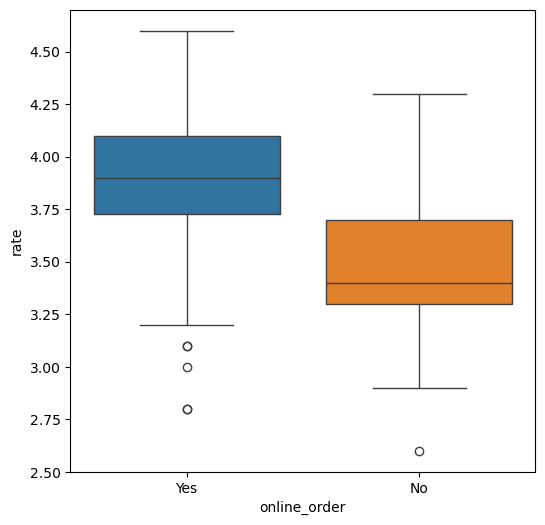

In [74]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', hue='online_order',data=dataframe, ,dodge='False)

<font size="5">**Conclusion- Offline order recieved lower rating in comparison to online order**

<font size="5">**Type of Restaurant Receiving More Offline Orders:**

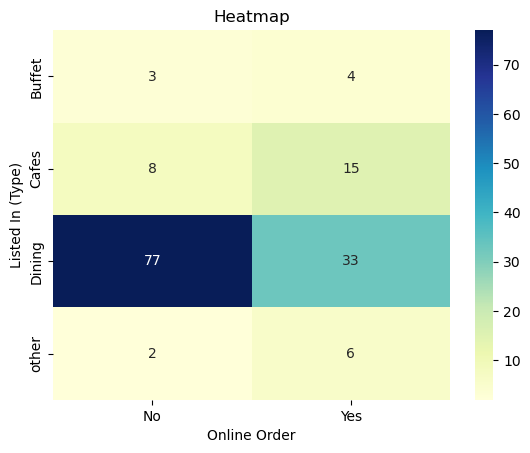

In [66]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

<font size="5">**Conclusion- Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefers to order in person at dining restaurants, but prefer online ordering at cafes.**